In [47]:
import requests
import time
import pandas as pd
import ipaddress
#modules needed
import folium
import random
import matplotlib.colors as mcolors
# visualizacion 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
#pio.renderers
#pio.renderers.default = 'notebook_connected'
pio.renderers.default='iframe'
import ipywidgets as widgets
from IPython.display import display, clear_output
from dotenv import load_dotenv
import os
load_dotenv()

True

In [48]:
measus = [ 
    {'measurements': [119569738]},
    {'measurements': [119569739]},
    {'measurements': [119569740]},
    {'measurements': [119569741]},
    {'measurements': [119569742]},
    {'measurements': [119569743]},
    {'measurements': [119569744]},
    {'measurements': [119569745]},
    {'measurements': [119569746]},
    {'measurements': [119569747]},
    {'measurements': [119569748]},
    {'measurements': [119569749]},
    {'measurements': [119569750]},
    {'measurements': [119569751]},
    {'measurements': [119569752]},
    {'measurements': [119569753]},
    {'measurements': [119569754]},
    {'measurements': [119569755]},
    {'measurements': [119569756]},
    {'measurements': [119569757]},
    {'measurements': [119569758]},
    {'measurements': [119569759]},
    {'measurements': [119569760]},
]


In [49]:
measus[0]['measurements'][0]

119569738

In [50]:
messi = [
    120715604,
    120715619,
    120715635,
    120715649,
    120715656,
    120715661,
    120715664,
    120715666,
    120715667,
    120715670,
    120715672,
    120715686,
    120715702,
    120715704,
    120715707,
    120715709,
    120715710,
    120715713,
    120715714,
    120715715,
    120715716,
    120715717,
    120715718,
    120715722,
    120715723,
    119570188,
    119570187,
    119570186,
    119570184,
    119570181,
    119570179,
    119570175,
    119570174,
    119570173,
    119570172,
    119570171,
    119570170,
    119570167,
    119570165,
    119570163,
    119570162,
    119570161,
    119570159,
    119570157,
    119570156,
    119570155,
    119570154,
    119570153,
    119570152,
    119570150,
    119569760,
    119569759,
    119569758,
    119569757,
    119569756,
    119569755,
    119569754,
    119569753,
    119569752,
    119569751,
    119569750,
    119569749,
    119569748,
    119569747,
    119569746,
    119569745,
    119569744,
    119569743,
    119569742,
    119569741,
    119569740,
    119569739,
    119569738,
]

In [51]:
messi[:5]

[120715604, 120715619, 120715635, 120715649, 120715656]

In [52]:
# Descarga los datos de todas las mediciones, que se han programado
data_vol = []
data_dst = []

for x in messi:
    #def get_measurment_data(self):
    #get the data of the probes involved in the measurements
    base_url="https://atlas.ripe.net/api/v2"
    api_key= os.getenv("API_KEY")
    mst_id = x
    results_url = f"{base_url}/measurements/{mst_id}/results/"
    headers = {"Authorization": f"Key {api_key}"}
    response = requests.get(results_url, headers=headers)
    results_data = response.json()
    data_vol.append(results_data)
    data_dst += results_data

In [53]:
len(data_vol)

73

In [54]:
len(data_dst)

1314

In [55]:
# mediones de internet
df_cc = pd.DataFrame(data_dst)

In [56]:
df_cc

,fw,mver,lts,endtime,dst_name,dst_addr,src_addr,proto,af,size,...,result,destination_ip_responded,msm_id,prb_id,timestamp,msm_name,from,type,group_id,stored_timestamp
0,5110,2.6.4,34,1753843315,204.225.221.41,204.225.221.41,200.58.72.13,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '200.58.72.2',...",True,120715604,1011626,1753843274,Traceroute,200.58.72.13,traceroute,120715604,1753843315
1,5080,2.6.2,45,1753843348,204.225.221.41,204.225.221.41,192.168.2.231,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '192.168.2.1',...",True,120715604,65389,1753843274,Traceroute,8.243.113.166,traceroute,120715604,1753843349
2,5090,2.6.4,33,1753843302,204.225.221.41,204.225.221.41,45.187.93.58,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '45.187.93.57'...",True,120715604,7500,1753843274,Traceroute,45.187.93.58,traceroute,120715604,1753843302
3,5080,2.6.2,23,1753843304,204.225.221.41,204.225.221.41,172.30.250.252,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '172.30.250.1'...",True,120715604,60070,1753843274,Traceroute,45.68.35.230,traceroute,120715604,1753843317
4,5080,2.6.2,8,1753843289,204.225.221.41,204.225.221.41,192.168.1.67,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '192.168.1.254...",True,120715604,19709,1753843275,Traceroute,201.108.128.178,traceroute,120715604,1753843290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,5080,2.6.2,32,1753329240,186.251.148.3,186.251.148.3,200.14.48.134,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '200.14.48.132...",True,119569745,12734,1753329212,Traceroute,200.14.48.134,traceroute,119569745,1753329242
1310,5080,2.6.2,29,1753329239,186.251.148.3,186.251.148.3,192.168.1.64,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '192.168.1.254...",True,119569745,35786,1753329212,Traceroute,187.223.247.61,traceroute,119569745,1753329239
1311,5080,2.6.2,3,1753329250,186.251.148.3,186.251.148.3,192.168.140.30,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '192.168.140.1...",True,119569745,27538,1753329212,Traceroute,190.15.136.121,traceroute,119569745,1753329251
1312,5080,2.6.2,21,1753329234,186.251.148.3,186.251.148.3,192.168.27.230,ICMP,4,48,...,"[{'hop': 1, 'result': [{'from': '192.168.27.25...",True,119569745,35556,1753329213,Traceroute,138.185.78.122,traceroute,119569745,1753329263


In [12]:
!pwd


/home/augusto/lacnic/workshop


In [13]:
# read the probe info csv
df_probes = pd.read_csv("/home/augusto/lacnic/inv-2025/sample_probes_ripe_23_5_25.csv")

In [57]:
df_probes

,address_v4,address_v6,asn_v4,asn_v6,country_code,description,firmware_version,first_connected,geometry,id,...,last_connected,prefix_v4,prefix_v6,status,status_since,tags,total_uptime,type,longitud,latitud
0,207.216.230.173,2001:569:7fa9:2001:220:4aff:fec8:2394,852.0,852.0,CA,V1 Probe,4790,1.291467e+09,"{'type': 'Point', 'coordinates': [-121.8185, 4...",281,...,1.753326e+09,207.216.0.0/16,2001:569::/33,Connected,1752825298,"[{'name': 'Home', 'slug': 'home'}, {'name': 'N...",433497507,Probe,-121.8185,49.1475
1,50.117.206.109,NaN,6058.0,NaN,CA,#1,4790,1.315421e+09,"{'type': 'Point', 'coordinates': [-135.0925, 6...",1118,...,1.753326e+09,50.117.192.0/20,NaN,Connected,1753181941,"[{'name': 'Cable', 'slug': 'cable'}, {'name': ...",412006534,Probe,-135.0925,60.7415
2,70.28.50.210,fd09:a830:32ac:c601:220:4aff:fec7:babb,577.0,NaN,CA,NaN,4790,1.312302e+09,"{'type': 'Point', 'coordinates': [-79.5385, 43...",1180,...,1.753326e+09,70.28.0.0/16,NaN,Connected,1753107767,"[{'name': 'Office', 'slug': 'office'}, {'name'...",112192556,Probe,-79.5385,43.6875
3,172.102.22.10,NaN,395075.0,NaN,CA,Home,4790,1.413387e+09,"{'type': 'Point', 'coordinates': [-71.2485, 47...",2987,...,1.753326e+09,172.102.16.0/20,NaN,Connected,1752510092,"[{'name': 'Home', 'slug': 'home'}, {'name': 's...",299897883,Probe,-71.2485,47.0005
4,149.248.50.86,2001:19f0:b001:346:5400:1ff:fecc:afac,20473.0,20473.0,CA,Choopa LLC,5090,1.545322e+09,"{'type': 'Point', 'coordinates': [-79.3605, 43...",6456,...,1.753326e+09,149.248.48.0/20,2001:19f0:b000::/38,Connected,1749546547,"[{'name': 'system: Anchor', 'slug': 'system-an...",196918483,Probe,-79.3605,43.6505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,138.59.167.224,2803:af80:1000:696:da58:d7ff:fe03:ca6,263732.0,263732.0,PY,Panda Conect SA,5080,1.728519e+09,"{'type': 'Point', 'coordinates': [-54.8505, -2...",65842,...,1.753326e+09,138.59.166.0/23,2803:af80::/33,Connected,1753226813,"[{'name': 'system: IPv4 RFC1918', 'slug': 'sys...",23564337,Probe,-54.8505,-24.5315
700,200.10.228.144,2001:1320:f000::228:144,27733.0,27733.0,PY,asu1-dns,5040,1.637080e+09,"{'type': 'Point', 'coordinates': [-57.5225, -2...",1003217,...,1.753326e+09,200.10.228.0/22,2001:1320::/32,Connected,1752865498,"[{'name': 'system: IPv4 Capable', 'slug': 'sys...",114841762,Probe,-57.5225,-25.3395
701,181.120.189.106,NaN,23201.0,NaN,PY,NaN,5080,1.729761e+09,"{'type': 'Point', 'coordinates': [-57.5815, -2...",1009135,...,1.753326e+09,181.120.188.0/22,NaN,Connected,1751214327,"[{'name': 'system: IPv4 Stable 90d', 'slug': '...",23546925,Probe,-57.5815,-25.2605
702,131.72.76.118,2803:cd80:2000:2::10,264811.0,264811.0,TT,Air Link Networks,5090,1.535790e+09,"{'type': 'Point', 'coordinates': [-61.3685, 10...",6393,...,1.753326e+09,131.72.76.0/22,2803:cd80::/33,Connected,1750464418,"[{'name': 'system: Anchor', 'slug': 'system-an...",215836144,Probe,-61.3685,10.2385


In [59]:
df_probes.to_dict(orient='records')[0]

{'address_v4': '207.216.230.173',
 'address_v6': '2001:569:7fa9:2001:220:4aff:fec8:2394',
 'asn_v4': 852.0,
 'asn_v6': 852.0,
 'country_code': 'CA',
 'description': 'V1 Probe',
 'firmware_version': 4790,
 'first_connected': 1291466956.0,
 'geometry': "{'type': 'Point', 'coordinates': [-121.8185, 49.1475]}",
 'id': 281,
 'is_anchor': False,
 'is_public': True,
 'last_connected': 1753326314.0,
 'prefix_v4': '207.216.0.0/16',
 'prefix_v6': '2001:569::/33',
 'status': 'Connected',
 'status_since': 1752825298,
 'tags': "[{'name': 'Home', 'slug': 'home'}, {'name': 'NAT', 'slug': 'nat'}, {'name': 'system: V1', 'slug': 'system-v1'}, {'name': 'system: IPv4 RFC1918', 'slug': 'system-ipv4-rfc1918'}, {'name': 'pi-hole', 'slug': 'pi-hole'}, {'name': 'IPv4', 'slug': 'ipv4'}, {'name': 'system: IPv4 Stable 1d', 'slug': 'system-ipv4-stable-1d'}, {'name': 'system: IPv6 Capable', 'slug': 'system-ipv6-capable'}, {'name': 'Telus', 'slug': 'telus'}, {'name': 'Fibre', 'slug': 'fibre'}, {'name': 'IPv6', 'slug

In [60]:
df_probes.groupby('address_v4').size().reset_index(name='count').sort_values(by='count')

,address_v4,count
0,103.106.58.254,1
424,200.71.222.24,1
425,200.75.221.74,1
426,200.9.157.207,1
427,200.94.182.170,1
...,...,...
291,189.28.90.41,2
434,201.187.150.43,2
356,191.112.112.52,2
135,172.17.0.1,3


In [61]:
df_unique = df_probes.drop_duplicates(subset='address_v4')


In [62]:
df_cc['dst_country'] = df_cc['dst_addr'].map(df_unique.set_index('address_v4')['country_code'])

In [63]:
df_cc['org_country'] = df_cc['prb_id'].map(df_probes.set_index('id')['country_code'])

# Salto Promedio Por Traceroute

In [64]:
def jump_hops(data):
    return len(data)

In [65]:
df_cc['jumps_dst'] = df_cc['result'].apply(jump_hops)

In [66]:
df_cc

,fw,mver,lts,endtime,dst_name,dst_addr,src_addr,proto,af,size,...,prb_id,timestamp,msm_name,from,type,group_id,stored_timestamp,dst_country,org_country,jumps_dst
0,5110,2.6.4,34,1753843315,204.225.221.41,204.225.221.41,200.58.72.13,ICMP,4,48,...,1011626,1753843274,Traceroute,200.58.72.13,traceroute,120715604,1753843315,CA,BO,19
1,5080,2.6.2,45,1753843348,204.225.221.41,204.225.221.41,192.168.2.231,ICMP,4,48,...,65389,1753843274,Traceroute,8.243.113.166,traceroute,120715604,1753843349,CA,PE,12
2,5090,2.6.4,33,1753843302,204.225.221.41,204.225.221.41,45.187.93.58,ICMP,4,48,...,7500,1753843274,Traceroute,45.187.93.58,traceroute,120715604,1753843302,CA,VE,16
3,5080,2.6.2,23,1753843304,204.225.221.41,204.225.221.41,172.30.250.252,ICMP,4,48,...,60070,1753843274,Traceroute,45.68.35.230,traceroute,120715604,1753843317,CA,HN,16
4,5080,2.6.2,8,1753843289,204.225.221.41,204.225.221.41,192.168.1.67,ICMP,4,48,...,19709,1753843275,Traceroute,201.108.128.178,traceroute,120715604,1753843290,CA,MX,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,5080,2.6.2,32,1753329240,186.251.148.3,186.251.148.3,200.14.48.134,ICMP,4,48,...,12734,1753329212,Traceroute,200.14.48.134,traceroute,119569745,1753329242,BR,CU,17
1310,5080,2.6.2,29,1753329239,186.251.148.3,186.251.148.3,192.168.1.64,ICMP,4,48,...,35786,1753329212,Traceroute,187.223.247.61,traceroute,119569745,1753329239,BR,MX,8
1311,5080,2.6.2,3,1753329250,186.251.148.3,186.251.148.3,192.168.140.30,ICMP,4,48,...,27538,1753329212,Traceroute,190.15.136.121,traceroute,119569745,1753329251,BR,EC,12
1312,5080,2.6.2,21,1753329234,186.251.148.3,186.251.148.3,192.168.27.230,ICMP,4,48,...,35556,1753329213,Traceroute,138.185.78.122,traceroute,119569745,1753329263,BR,BZ,15


In [67]:
df_cc[['org_country','dst_country','jumps_dst']]

,org_country,dst_country,jumps_dst
0,BO,CA,19
1,PE,CA,12
2,VE,CA,16
3,HN,CA,16
4,MX,CA,13
...,...,...,...
1309,CU,BR,17
1310,MX,BR,8
1311,EC,BR,12
1312,BZ,BR,15


In [68]:
df_traces = df_cc[['org_country','dst_country','jumps_dst']]
hop_matrix = df_traces.pivot_table(
    index="org_country",
    columns="dst_country",
    values="jumps_dst",
    aggfunc="mean" )


hop_matrix


dst_country,AR,BO,BR,BZ,CA,CL,CO,CR,CU,DO,...,NI,PA,PE,PR,PY,SV,TT,US,UY,VE
org_country,,,,,,,,,,,,,,,,,,,,,
AR,7.0,21.0,12.000000,23.0,15.5,15.0,20.0,16.000000,18.5,12.0,...,12.0,10.5,14.0,11.0,13.5,21.5,14.000000,12.5,12.0,12.0
BO,15.0,12.0,16.000000,19.0,18.0,19.0,24.0,19.333333,22.0,20.0,...,20.0,16.5,20.0,16.5,24.0,19.0,15.666667,18.0,18.0,14.0
BR,10.0,14.0,8.000000,19.0,9.5,15.0,22.0,8.666667,21.0,16.5,...,22.0,16.0,18.0,9.5,18.0,18.5,15.333333,12.5,9.0,11.5
BZ,12.5,22.0,16.666667,1.0,15.5,17.0,20.0,11.000000,17.0,12.5,...,17.0,14.0,18.5,14.0,18.0,15.0,14.333333,14.0,14.0,12.0
CA,14.0,24.0,15.333333,21.0,14.0,16.0,26.0,15.333333,21.5,16.5,...,20.0,19.5,18.0,18.5,20.5,22.0,16.333333,10.0,19.0,10.0
CL,8.0,18.0,9.333333,17.5,11.0,12.0,24.0,13.666667,18.5,9.5,...,18.0,14.0,14.0,14.0,15.5,16.0,16.000000,12.5,13.0,13.5
CO,15.0,19.0,14.000000,15.0,11.5,18.0,16.0,9.333333,16.5,13.5,...,17.0,14.0,16.0,16.0,22.0,18.0,11.000000,15.0,12.0,15.0
CR,15.5,17.0,13.333333,17.0,13.0,NaN,24.0,7.000000,20.0,13.5,...,16.0,11.5,11.5,12.5,17.0,13.0,13.500000,14.0,15.0,11.5
CU,14.5,19.0,14.666667,19.0,17.0,18.0,20.0,16.333333,1.0,14.0,...,18.0,14.0,19.0,16.5,19.0,19.0,16.000000,16.5,16.0,16.0


In [69]:
hop_matrix = hop_matrix.fillna(0)

In [70]:
import plotly.express as px

#df = px.data.medals_wide(indexed=True)
fig = px.imshow(hop_matrix,text_auto=True)
# fig.update_layout(title_text="Traceroutes Sankey Diagram Just Public IPs", font_size=6)

# Agregar títulos y personalización
fig.update_layout(
    title="Saltos  Promedios por Traceroute",
    xaxis_title="Destination Country",
    yaxis_title="Source Country",
    title_font_size=20,
    title_x=0.5,  # Centrar el título
    font_size=14
)
fig.show()

# Latencia Total de la Ruta



In [42]:
data_vol[0][0]

{'fw': 5110,
 'mver': '2.6.4',
 'lts': 34,
 'endtime': 1753843315,
 'dst_name': '204.225.221.41',
 'dst_addr': '204.225.221.41',
 'src_addr': '200.58.72.13',
 'proto': 'ICMP',
 'af': 4,
 'size': 48,
 'paris_id': 1,
 'result': [{'hop': 1,
   'result': [{'from': '200.58.72.2', 'ttl': 64, 'size': 76, 'rtt': 1.742},
    {'from': '200.58.72.2', 'ttl': 64, 'size': 76, 'rtt': 0.44},
    {'from': '200.58.72.2', 'ttl': 64, 'size': 76, 'rtt': 0.437}]},
  {'hop': 2,
   'result': [{'from': '190.11.72.1', 'ttl': 63, 'size': 76, 'rtt': 0.437},
    {'from': '190.11.72.1', 'ttl': 63, 'size': 76, 'rtt': 0.446},
    {'from': '190.11.72.1', 'ttl': 63, 'size': 76, 'rtt': 0.401}]},
  {'hop': 3, 'result': [{'x': '*'}, {'x': '*'}, {'x': '*'}]},
  {'hop': 4,
   'result': [{'from': '190.129.252.8',
     'ttl': 244,
     'size': 144,
     'rtt': 6.343,
     'icmpext': {'version': 0,
      'rfc4884': 1,
      'obj': [{'class': 0, 'type': 0}]}},
    {'from': '190.129.252.8',
     'ttl': 244,
     'size': 144,
   

In [71]:
# take the last one
data_vol[0][0]['result'][-1]

{'hop': 19,
 'result': [{'from': '204.225.221.41', 'ttl': 48, 'size': 48, 'rtt': 324.269},
  {'from': '204.225.221.41', 'ttl': 48, 'size': 48, 'rtt': 334.779},
  {'from': '204.225.221.41', 'ttl': 48, 'size': 48, 'rtt': 351.797}]}

In [72]:
[ x['rtt'] for x in data_vol[0][0]['result'][-1]['result'] ]

[324.269, 334.779, 351.797]

In [73]:
def extract_last_rtt_v2(data):
    try:
        last_hop = data[-1]['result']
        rtts = [entry['rtt'] for entry in last_hop if 'rtt' in entry]
        return rtts if rtts else [0]
    except Exception:
        return [0]


In [74]:
def extract_last_valid_rtt(data):
    # Recorrer de atrás hacia adelante
    for hop in reversed(data):
        results = hop.get("result", [])
        rtts = [entry['rtt'] for entry in results if 'rtt' in entry]
        if rtts:
            return rtts  # Devuelve todos los RTTs válidos de ese hop
    return [0]  # Si no encuentra ninguno


In [75]:
def extract_last_rtt(data):
    try:
        return [ x['rtt'] for x in data[-1]['result'] ]  
    except:
        return [0]

In [76]:
df_cc['time_rtt'] = df_cc['result'].apply(extract_last_valid_rtt)

In [77]:
import numpy as np

def data_mean(data):
    return np.mean(data)

In [78]:
df_cc['avg_tr'] = df_cc['time_rtt'].apply(data_mean)

In [79]:
df_cc.sort_values(by='avg_tr')

,fw,mver,lts,endtime,dst_name,dst_addr,src_addr,proto,af,size,...,msm_name,from,type,group_id,stored_timestamp,dst_country,org_country,jumps_dst,time_rtt,avg_tr
953,5090,2.6.4,274,1753332181,38.25.52.13,38.25.52.13,45.5.10.13,ICMP,4,48,...,Traceroute,45.5.10.13,traceroute,119570163,1753332182,PE,DO,1,"[0.148, 0.219, 0.236]",0.201000
1086,5090,2.6.4,32,1753333433,138.255.248.5,138.255.248.5,45.5.10.13,ICMP,4,48,...,Traceroute,45.5.10.13,traceroute,119570156,1753333440,DO,DO,1,"[0.202, 0.165, 0.332]",0.233000
700,5090,2.6.4,14,1753331921,136.145.231.9,136.145.231.9,45.5.10.13,ICMP,4,48,...,Traceroute,45.5.10.13,traceroute,119570184,1753331922,PR,DO,1,"[0.321, 0.258, 0.26]",0.279667
1104,5090,2.6.4,21,1753331928,66.9.168.160,66.9.168.160,45.5.10.13,ICMP,4,48,...,Traceroute,45.5.10.13,traceroute,119570155,1753331939,HT,DO,1,"[0.297, 0.255, 0.295]",0.282333
765,5080,2.6.2,54,1753332638,138.185.78.122,138.185.78.122,192.168.27.230,ICMP,4,48,...,Traceroute,138.185.78.122,traceroute,119570175,1753332693,BZ,BZ,1,"[0.457, 0.279, 0.235]",0.323667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,5110,2.6.4,39,1753332629,200.10.228.49,200.10.228.49,200.40.131.67,ICMP,4,48,...,Traceroute,200.40.131.67,traceroute,119570187,1753332630,PY,UY,22,"[1561.945, 3059.359, 3057.998]",2559.767333
637,5080,2.6.2,38,1753332609,200.10.228.49,200.10.228.49,190.8.168.42,ICMP,4,48,...,Traceroute,190.8.168.42,traceroute,119570187,1753332609,PY,VE,21,"[1542.52, 3199.776, 3199.85]",2647.382000
655,4790,NaN,1,1753332609,200.10.228.49,200.10.228.49,192.168.175.239,ICMP,4,48,...,Traceroute,70.225.5.83,traceroute,119570187,1753332618,PY,US,21,"[2251.42, 3191.561, 3191.854]",2878.278333
641,5080,2.6.2,6,1753332510,200.10.228.49,200.10.228.49,192.168.100.2,ICMP,4,48,...,Traceroute,186.122.80.32,traceroute,119570187,1753332511,PY,PY,6,"[3017.846, 3019.692, 3019.694]",3019.077333


In [82]:
df_cc_fil = df_cc.query("avg_tr < 500")
#df_cc_fil = df_cc

<Axes: >

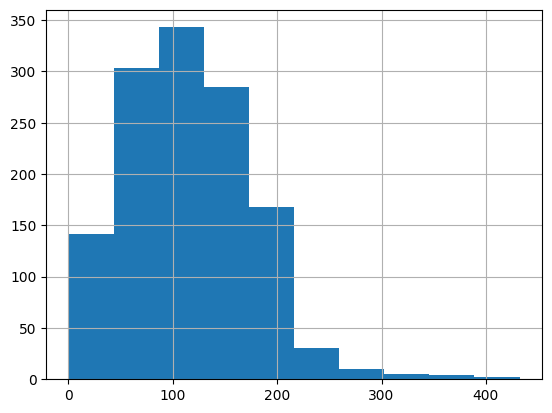

In [83]:
df_cc_fil['avg_tr'].hist()

In [84]:
df_traces = df_cc_fil[['org_country','dst_country','avg_tr']]
# Crear la matriz pivote: las filas son origen, las columnas destino, y el valor es hops
hop_matrix_rtt = df_traces.pivot_table(
    index="org_country",
    columns="dst_country",
    values="avg_tr",
    aggfunc="mean"  # o 'min', 'max', etc. si hay múltiples trazas
)
hop_matrix_rtt = hop_matrix_rtt.fillna(0)

In [85]:
#df = px.data.medals_wide(indexed=True)
fig = px.imshow(hop_matrix_rtt,text_auto=True)
# Agregar títulos y personalización
fig.update_layout(
    title="Latencia Total dela Ruta",
    xaxis_title="Destination Country",
    yaxis_title="Source Country",
    title_font_size=20,
    title_x=0.5  # Centrar el título
)
fig.show()